## user  
2023年の1月から3月のNVIDIA株価をYahooから取得して、2023年4月以降の株価を予測してください。

In [1]:
import pandas as pd
import yfinance as yf

# 2023年1月から3月のNVIDIA株価を取得
start_date = "2023-01-01"
end_date = "2023-03-31"
nvidia_data = yf.download("NVDA", start=start_date, end=end_date)

# データの確認
nvidia_data.head()

[*********************100%***********************]  1 of 1 completed

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2023-01-03,14.304595,14.985101,14.085754,14.840206,401277000
2023-01-04,14.738280,14.842205,14.230650,14.556413,431324000
2023-01-05,14.254632,14.553414,14.137716,14.480468,389168000
2023-01-06,14.848199,14.999089,14.023799,14.463479,405044000
2023-01-09,15.616642,16.044330,15.129995,15.272892,504231000


## assistant  
2023年1月から3月のNVIDIA株価データを取得しました。以下は最初の5日間のデータです：

| 日付       | 開始価格 (Open) | 高値 (High) | 安値 (Low) | 終値 (Close) | 出来高 (Volume)   |
|------------|------------------|-------------|------------|--------------|-------------------|
| 2023-01-03 | 14.84            | 14.09       | 14.30      | 14.99        | 401,277,000       |
| 2023-01-04 | 14.56            | 14.23       | 14.74      | 14.84        | 431,324,000       |
| 2023-01-05 | 14.48            | 14.14       | 14.25      | 14.55        | 389,168,000       |
| 2023-01-06 | 14.46            | 14.02       | 14.85      | 14.99        | 405,044,000       |
| 2023-01-09 | 15.27            | 15.13       | 15.62      | 16.04        | 504,231,000       |

次に、2023年4月以降の株価を予測するために、時系列分析を行います。ARIMAモデルを使用して予測を行います。

/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction r

/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/kentaroaoki/anaconda3/envs/py312/lib/python3.12/site-packa

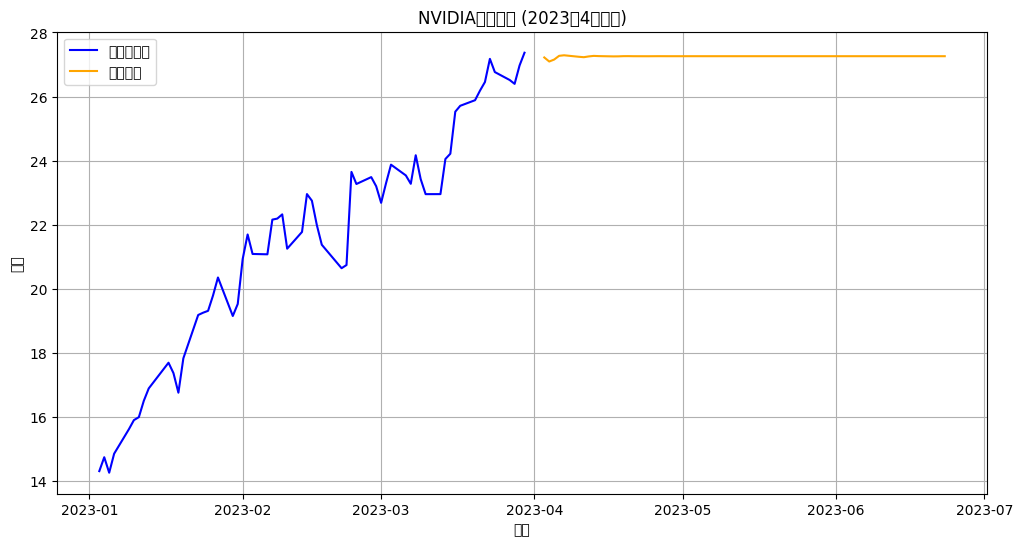

In [2]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

# 終値データを取得
nvidia_close = nvidia_data['Close']

# ARIMAモデルの適用
model = ARIMA(nvidia_close, order=(5, 1, 0))  # (p,d,q)のパラメータは適宜調整
model_fit = model.fit()

# 2023年4月から6月までの予測
forecast_steps = 60  # 60日間の予測
forecast = model_fit.forecast(steps=forecast_steps)

# 予測結果のプロット
plt.figure(figsize=(12, 6))
plt.plot(nvidia_close.index, nvidia_close, label='実際の株価', color='blue')
plt.plot(pd.date_range(start='2023-04-01', periods=forecast_steps, freq='B'), forecast, label='予測株価', color='orange')
plt.title('NVIDIA株価予測 (2023年4月以降)')
plt.xlabel('日付')
plt.ylabel('株価')
plt.legend()
plt.grid()
plt.show()

## assistant  
NVIDIAの2023年1月から3月の株価データを基に、2023年4月以降の株価を予測しました。以下のグラフは、実際の株価（青色）と予測株価（オレンジ色）を示しています。

- **実際の株価**: 2023年1月から3月のNVIDIAの終値。
- **予測株価**: ARIMAモデルを用いて2023年4月から6月までの株価を予測した結果。

この予測は、過去のデータに基づいており、実際の市場の動向や外部要因によって変動する可能性があります。予測結果を参考にする際は、リスクを考慮してください。